In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('HR_Analytics.csv')

In [3]:
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [5]:
df.shape

(1480, 38)

In [ ]:
df.isnull().sum()

EmpID                       False
Age                         False
AgeGroup                    False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
SalarySlab                  False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours 

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [19]:
df.fillna(0,inplace=True)

In [20]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [30]:
df.groupby('Attrition')['Age'].mean()

Attrition
No     37.538647
Yes    33.676471
Name: Age, dtype: float64

In [ ]:
df.groupby('Attrition')[['Age','DailyRate']].mean()

,Age,DailyRate
Attrition,,
No,37.538647,811.435588
Yes,33.676471,748.932773


In [32]:
df.groupby('Attrition')[['MonthlyIncome','DailyRate']].mean()

,MonthlyIncome,DailyRate
Attrition,,
No,6829.294686,811.435588
Yes,4812.584034,748.932773


In [33]:
df.groupby(['Attrition','Education'])[['MonthlyIncome','DailyRate']].mean()

MonthlyIncome   DailyRate
Attrition Education                           
No        1            5998.255319  818.361702
          2            6569.259414  835.104603
          3            6871.253138  792.441423
          4            7078.129032  822.879765
          5            8559.906977  777.558140
Yes       1            4360.161290  830.870968
          2            4282.545455  752.840909
          3            4831.080000  721.110000
          4            5335.155172  741.000000
          5            5850.200000  855.000000

In [ ]:
df.groupby(['Gender','Attrition','Education'])[['MonthlyIncome','DailyRate']].mean()

MonthlyIncome   DailyRate
Gender Attrition Education                           
Female No        1            6015.720000  823.500000
                 2            6604.908163  814.897959
                 3            7152.984848  830.530303
                 4            7108.043165  819.863309
                 5            9638.947368  765.368421
       Yes       1            5284.636364  887.727273
                 2            3921.052632  771.631579
                 3            4925.947368  726.500000
                 4            4686.812500  571.625000
                 5            6720.333333  820.000000
Male   No        1            5988.659341  815.538462
                 2            6544.482270  849.148936
                 3            6672.028571  765.507143
                 4            7057.544554  824.955446
                 5            7705.666667  787.208333
       Yes       1            3851.700000  799.600000
                 2            4557.280000  738.560000
                 3            4772.935484  717.806452
                 4            5582.142857  805.523810
                 5            4545.000000  907.500000

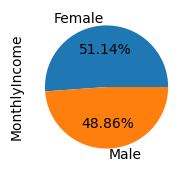

In [54]:
df.groupby('Gender')['MonthlyIncome'
                        ].mean().plot(kind = 'pie', 
                                figsize=(3,2),
                                autopct = '%0.2f%%')
plt.show()

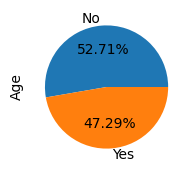

In [55]:
df.groupby('Attrition')['Age'
                        ].mean().plot(kind = 'pie', 
                                figsize=(3,2),
                                autopct = '%0.2f%%')
plt.show()

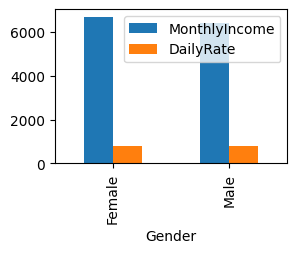

In [43]:
df.groupby(['Gender'])[['MonthlyIncome',
                        'DailyRate']].mean().plot(kind = 'bar',
                                                            figsize=(3,2))
plt.show()

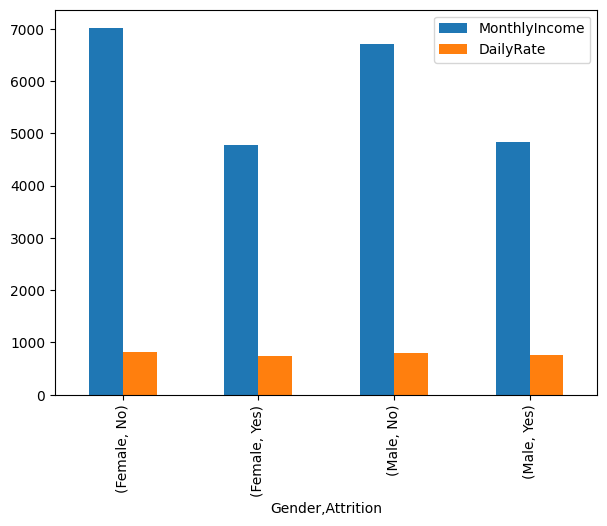

In [63]:
df.groupby(['Gender',"Attrition"])[['MonthlyIncome',
                        'DailyRate']].mean().plot(kind = 'bar',
                                                figsize=(7,5))
plt.show()

In [69]:
pd.pivot_table(df,index='Attrition',
         columns='Gender',
         values='DailyRate',
         aggfunc='count')

Gender,Female,Male
Attrition,,
No,504,738
Yes,87,151


In [71]:
pd.pivot_table(df,index='Attrition',
         columns='Gender',
         values='DailyRate',
         aggfunc='var')


Gender,Female,Male
Attrition,,
No,163314.128085,161612.053215
Yes,178317.159583,152385.399823


In [72]:
pd.pivot_table(df,index='Attrition',
         columns='Gender',
         values='DailyRate',
         aggfunc=['min','max'])

min         max      
Gender    Female Male Female  Male
Attrition                         
No           102  105   1499  1498
Yes          104  103   1485  1496

In [77]:
pd.pivot_table(df,index=['Attrition','Department'],
         columns='Gender',
         values='MonthlyIncome',
         aggfunc=['sum','mean'])

sum                  mean             
Gender                             Female     Male       Female         Male
Attrition Department                                                        
No        Human Resources          122656   251989  8761.142857  6810.513514
          Research & Development  2291329  3235410  6799.195846  6509.879276
          Sales                   1121531  1459069  7330.267974  7152.299020
Yes       Human Resources           22624    21965  3770.666667  3660.833333
          Research & Development   181145   365229  4212.674419  4058.100000
          Sales                    211198   343234  5557.842105  6240.618182

In [79]:
pd.pivot_table(df,index=['Attrition','Department'],
         columns=['MaritalStatus','Gender'],
         values='MonthlyIncome',
         aggfunc=['count','mean'])

count                                      \
MaritalStatus                    Divorced        Married        Single          
Gender                             Female   Male  Female   Male Female   Male   
Attrition Department                                                            
No        Human Resources             1.0   10.0     8.0   20.0    5.0    7.0   
          Research & Development     79.0  127.0   149.0  239.0  109.0  131.0   
          Sales                      28.0   49.0    85.0   94.0   40.0   61.0   
Yes       Human Resources             3.0    2.0     3.0    3.0    NaN    1.0   
          Research & Development      4.0   14.0    18.0   31.0   21.0   45.0   
          Sales                       2.0    9.0    10.0   19.0   26.0   27.0   

                                         mean                             \
MaritalStatus                        Divorced                    Married   
Gender                                 Female         Male        Female   
Attrition Department                                                       
No        Human Resources         3195.000000  5953.000000  10222.375000   
          Research & Development  7015.822785  6969.259843   7017.563758   
          Sales                   7297.535714  7604.204082   7641.294118   
Yes       Human Resources         4957.000000  2204.000000   2584.333333   
          Research & Development  2553.250000  4047.428571   5718.222222   
          Sales                   2575.500000  6628.333333   7114.000000   

                                                                         
MaritalStatus                                       Single               
Gender                                   Male       Female         Male  
Attrition Department                                                     
No        Human Resources         6719.600000  7536.400000  8295.285714  
          Research & Development  6528.748954  6343.688073  6030.099237  
          Sales                   7170.851064  6692.250000  6760.704918  
Yes       Human Resources         4997.666667          NaN  2564.000000  
          Research & Development  4828.709677  3238.285714  3530.555556  
          Sales                   6338.789474  5188.730769  6042.296296